In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#from https://metrics.mta.info/?bus/speeds
#BUS Speed Before Congestion pricing
months_2024 = [
    "Jan 2024", "Feb 2024", "Mar 2024", "Apr 2024",
    "May 2024", "Jun 2024", "Jul 2024", "Aug 2024",
    "Sep 2024", "Oct 2024", "Nov 2024", "Dec 2024"
]

m101_data = {
    "Month": months_2024,
    "Route": ["M101"] * 12,   
    "MPH": [6.4, 6.4, 6.4, 6.3, 6.3, 6.4, 6.5, 6.5, 6.4, 6.3, 6.4, 6.4]         
}

m15_data = {
    "Month": months_2024,
    "Route": ["M15"] * 12,   
    "MPH": [6.5, 6.5, 6.5, 6.4, 6.4, 6.4, 6.4, 6.5, 6.4, 6.3, 6.4, 6.4]        
}

m15plus_data = {
    "Month": months_2024,
    "Route": ["M15+"] * 12,   
    "MPH": [8, 7.9, 7.9, 7.8, 7.7, 7.8, 7.8, 7.9, 7.5, 7.6, 7.8, 7.8]         
}

m2_data = {
    "Month": months_2024,
    "Route": ["M2"] * 12,   
    "MPH": [6.7, 6.7, 6.6, 6.5, 6.4, 6.5, 6.7, 6.6, 6.5, 6.3, 6.5, 8.0]         
}

m42_data = {
    "Month": months_2024,
    "Route": ["M42"] * 12,  
    "MPH": [5.1, 5.0, 4.8, 4.9, 4.7, 4.7, 4.9, 4.9, 4.9, 4.8, 4.8, 4.7]         
}

m14plus_data = {
    "Month": months_2024,
    "Route": ["M14A+"] * 12,   
    "MPH": [5.9, 5.6, 5.6, 5.6, 5.7, 5.6, 5.7, 5.7, 5.6, 5.7, 5.8, 5.8]         
}

m14dplus_data = {
    "Month": months_2024,
    "Route": ["M14D+"] * 12,   
    "MPH": [6.2, 6.1, 6.1, 6.1, 6.0, 6.0, 6.1, 6.2, 6.1, 6.1, 6.2, 6.2]       
}

m23plus_data = {
    "Month": months_2024,
    "Route": ["M23+"] * 12,  
    "MPH": [5.9, 5.7, 5.7, 5.7, 5.6, 5.7, 5.8, 5.8, 5.5, 5.6, 5.6, 5.7]         
}

m34plus_data = {
    "Month": months_2024,
    "Route": ["M34+"] * 12,  
    "MPH": [5.6, 5.4, 5.3, 5.3, 5.2, 5.3, 5.4, 5.3, 5.2, 5.1, 5.2, 5.2]        
}

In [3]:
# list of all your route dictionaries
all_routes = [
    m101_data, m15_data, m15plus_data,
    m2_data, m42_data, m14plus_data,
    m14dplus_data, m23plus_data, m34plus_data
]

# convert each dict to DataFrame and combine
df_all = pd.concat([pd.DataFrame(route) for route in all_routes], ignore_index=True)

df_all.head()

,Month,Route,MPH
0,Jan 2024,M101,6.4
1,Feb 2024,M101,6.4
2,Mar 2024,M101,6.4
3,Apr 2024,M101,6.3
4,May 2024,M101,6.3


In [4]:
#Bus Speed After Congestion pricing
months_2025 = [
    "Jan 2024", "Feb 2024", "Mar 2024", "Apr 2024",
    "May 2024", "Jun 2024", "Jul 2024"
]


m101_data2 = {
    "Month": months_2025,
    "Route": ["M101"] * 7,   
    "MPH": [6.4, 6.3, 6.5, 6.3, 6.3, 6.4, 6.4]         
}

m15_data2 = {
    "Month": months_2025,
    "Route": ["M15"] * 7,   
    "MPH": [6.5, 6.4, 6.3, 6.3, 6.3, 6.4, 6.4]        
}

m15plus_data2 = {
    "Month": months_2025,
    "Route": ["M15+"] * 7,   
    "MPH": [6.5, 6.4, 6.4, 6.3, 6.3, 6.4, 6.4]         
}

m2_data2 = {
    "Month": months_2025,
    "Route": ["M2"] * 7,   
    "MPH": [6.7, 6.7, 6.7, 6.5, 6.4, 6.5, 6.6]         
}

m42_data2 = {
    "Month": months_2025,
    "Route": ["M42"] * 7,  
    "MPH": [5.3, 5.2, 5.2, 5.1, 5.0, 5.0, 5.0]         
}

m14plus_data2 = {
    "Month": months_2025,
    "Route": ["M14A+"] * 7,   
    "MPH": [5.9, 5.8, 5.9, 6.0, 5.9, 5.9, 5.9]         
}

m14dplus_data2 = {
    "Month": months_2025,
    "Route": ["M14D+"] * 7,   
    "MPH": [6.3, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2]       
}

m23plus_data2 = {
    "Month": months_2025,
    "Route": ["M23+"] * 7,  
    "MPH": [5.9, 5.8, 5.8, 5.8, 5.7, 5.7, 5.8]         
}

m34plus_data2 = {
    "Month": months_2025,
    "Route": ["M34+"] * 7,  
    "MPH": [5.7, 5.5, 5.6, 5.6, 5.4, 5.4, 5.4]        
}

In [5]:
# combine all into one DataFrame
all_routes_after2 = [
    m101_data2, m15_data2, m15plus_data2,
    m2_data2, m42_data2, m14plus_data2,
    m14dplus_data2, m23plus_data2, m34plus_data2
]

df_after2 = pd.concat([pd.DataFrame(route) for route in all_routes_after2], ignore_index=True)


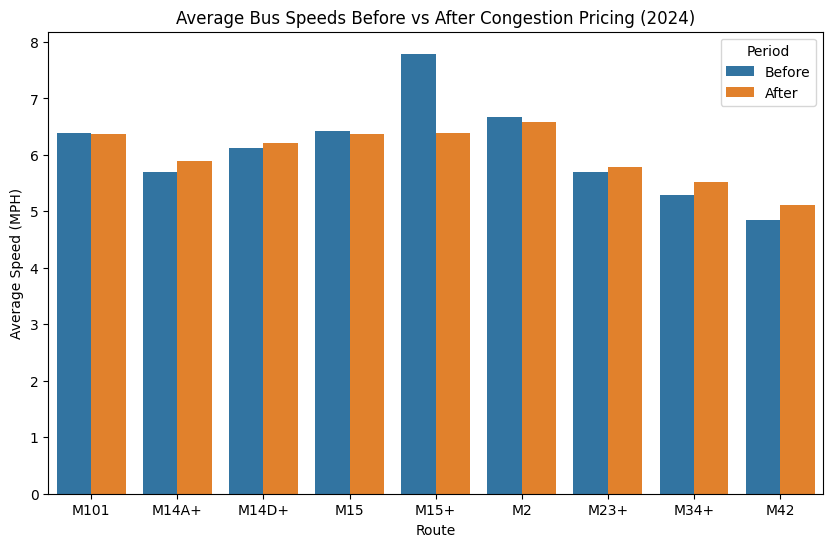

In [6]:
# Label datasets
df_all["Period"] = "Before"
df_after2["Period"] = "After"

# Combine
df_compare = pd.concat([df_all, df_after2], ignore_index=True)

# Average speeds per route + period
df_summary = (
    df_compare.groupby(["Route", "Period"])["MPH"]
              .mean()
              .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_summary,
    x="Route", y="MPH",
    hue="Period",
    order=sorted(df_summary["Route"].unique()),   # make sure all routes show
    hue_order=["Before", "After"]                 # force order: Before → After
)

plt.title("Average Bus Speeds Before vs After Congestion Pricing (2024)")
plt.ylabel("Average Speed (MPH)")
plt.show()

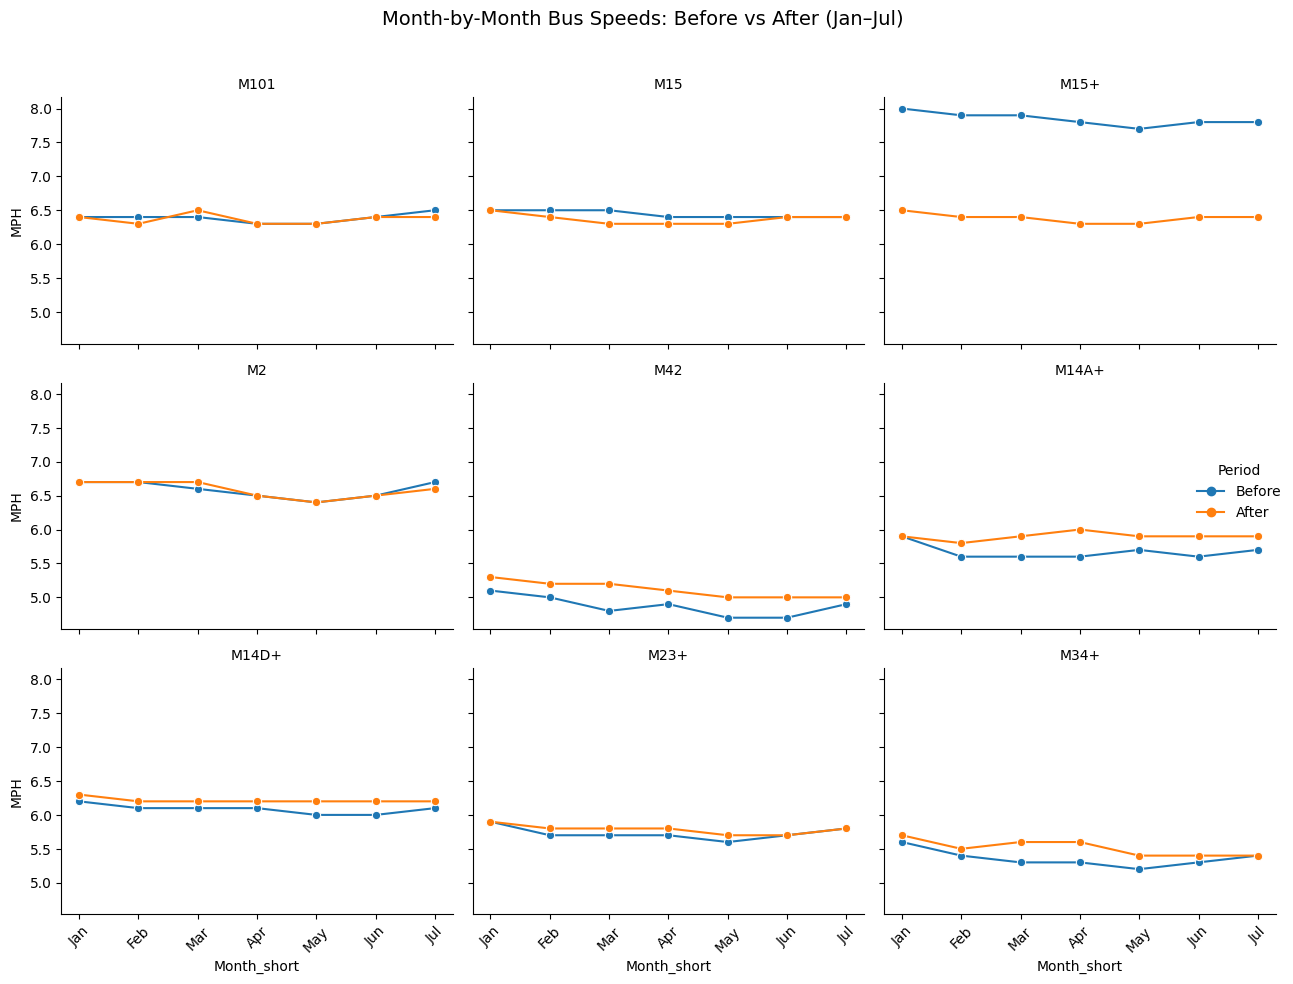

In [7]:
#Create a chart
months_subset = ["Jan 2024","Feb 2024","Mar 2024","Apr 2024","May 2024","Jun 2024","Jul 2024"]

df_before_sub = df_all[df_all["Month"].isin(months_subset)].copy()
df_before_sub["Period"] = "Before"

df_after_sub = df_after2.copy()
df_after_sub["Period"] = "After"

df_cmp = pd.concat([df_before_sub, df_after_sub], ignore_index=True)

# Add a shorter month label (Jan, Feb, ...)
df_cmp["Month_short"] = df_cmp["Month"].str.split().str[0]

# Reorder months properly
months_short_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
df_cmp["Month_short"] = pd.Categorical(df_cmp["Month_short"], categories=months_short_order, ordered=True)

# Plot again using Month_short
g = sns.relplot(
    data=df_cmp,
    x="Month_short", y="MPH",
    hue="Period", hue_order=["Before", "After"],
    kind="line", marker="o",
    col="Route", col_wrap=3, height=3.2, aspect=1.25
)
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

g.fig.suptitle("Month-by-Month Bus Speeds: Before vs After (Jan–Jul)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


Looking at the graph, the bus speed stayed either similar or faster in bus route except of M15+. 

Running a T-Test would check if the difference in significant.

In [8]:
from scipy.stats import ttest_ind

routes = df_cmp["Route"].unique()
results = []

for route in routes:
    before = df_cmp[(df_cmp["Route"] == route) & (df_cmp["Period"] == "Before")]["MPH"]
    after  = df_cmp[(df_cmp["Route"] == route) & (df_cmp["Period"] == "After")]["MPH"]
    
    # run Welch’s t-test (safe if variances differ)
    t_stat, p_val = ttest_ind(before, after, equal_var=False, nan_policy="omit")
    
    results.append({
        "Route": route,
        "Before Mean": before.mean(),
        "After Mean": after.mean(),
        "t-stat": t_stat,
        "p-value": p_val
    })

ttest_results = pd.DataFrame(results)
print(ttest_results)

   Route  Before Mean  After Mean     t-stat       p-value
0   M101     6.385714    6.371429   0.369274  7.184093e-01
1    M15     6.442857    6.371429   2.041241  6.643315e-02
2   M15+     7.842857    6.385714  32.255232  4.369860e-12
3     M2     6.585714    6.585714   0.000000  1.000000e+00
4    M42     4.871429    5.114286  -3.333974  6.277917e-03
5  M14A+     5.671429    5.900000  -4.824182  9.378093e-04
6  M14D+     6.085714    6.214286  -4.323460  1.780451e-03
7   M23+     5.728571    5.785714  -1.286535  2.248011e-01
8   M34+     5.357143    5.514286  -2.363179  3.588447e-02


| Route | P-Value | Interpretation |
| :----------- | :------: | ------------: |
| M101    | 0.72  | No meaningful change       |
| M15      | 0.066  | Not significant       |
| M15+      |  0.000000000004 | Very significant change; huge drop       |
| M2     | 1.00  | Exactly the same avg      |
| M42      | 0.006  | Significant increase      |
| M14A+      | 0.0009  | Significant increase      |
| M14D+     | 0.0018  | Significant increase       |
| M23+      | 0.22  | not significant.     |
| M34+      | 0.036  | Significant increase     |